# PyVG: Data Science to predict Video Games sales
>Equipe: Alexis Terrasse, Henri-François Mole, Hsan Drissi, Stephane Lelievre
>
>Promo: DS_Oct21
---
## 01 - Exploratory data analysis
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Le jeu de données utilisé pour ce projet est disponible sur le site de Kaggle (https://www.kaggle.com/gregorut/videogamesales) et a été publié en 2017.

In [2]:
df = pd.read_csv('../data/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Taille du jeux de données
print ('Taille du jeux de données:' , df.shape, '\n')

# Caracteristique des colonnes
print (df.info())

Taille du jeux de données: (16598, 11) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


### Données manquantes, distribution et valeurs abérantes

In [4]:
df_col = df.isna().sum().sort_values(ascending=False).to_frame('NaN sum')
df_col['NaN %'] =  (100*df.isna().sum()/df.shape[0]).sort_values(ascending=False)
df_col.head()

,NaN sum,NaN %
Year,271,1.632727
Publisher,58,0.349440
Rank,0,0.000000
Name,0,0.000000
Platform,0,0.000000


In [5]:
# Distribution et valeurs aberrantes 'outliers)'
df.describe(percentiles=np.linspace(0.1,0.9,9))
df.describe(percentiles=[.5])

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


- Il y a enregistrement de 2020 alors que ka dataset date de 2017
- 90% des jeux ont des ventes <= 1.21M$
- la colonne Rank n'est pas pertinante car c'est un classement à l'instant t sur la base de la cible à prédire justement !
- les Global_Sales est la somme des autres XX_Sales
- il reste juste l'année en donnée numerique

> on denombre 4 variables catérorielles

In [6]:
df_cat = df.select_dtypes(include='object')
df_cat_modalities = pd.DataFrame({'Modalités': [df_cat['Name'].unique().shape[0],
                                              df_cat['Platform'].unique().shape[0],
                                              df_cat['Genre'].unique().shape[0],
                                              df_cat['Publisher'].unique().shape[0]],
                                 'Description': ['',','.join(df_cat['Genre'].unique()),
                                                      ','.join(df_cat['Platform'].unique()),
                                                      "<too many>"]},
                                index=df_cat.columns)
df_cat_modalities

,Modalités,Description
Name,11493,
Platform,31,"Sports,Platform,Racing,Role-Playing,Puzzle,Mis..."
Genre,12,"Wii,NES,GB,DS,X360,PS3,PS2,SNES,GBA,3DS,PS4,N6..."
Publisher,579,<too many>


- il y a moins de modalités sur le nom des jeux que de nombre de jeux au total
- cela veut certainement dire qu'un jeu est present plusieurs fois

In [7]:
print (df['Name'].value_counts())
df[df['Name']=='Ratatouille'].head(5)

Need for Speed: Most Wanted             12
LEGO Marvel Super Heroes                 9
Ratatouille                              9
Madden NFL 07                            9
FIFA 14                                  9
                                        ..
The Guided Fate Paradox                  1
Urban Chaos                              1
Crayon Shin-Chan: Arashi o Yobu Enji     1
Dragon Quest Monsters: Caravan Heart     1
Naruto Shippuden 3D: The New Era         1
Name: Name, Length: 11493, dtype: int64


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1578,1580,Ratatouille,DS,2007.0,Action,THQ,0.50,0.62,0.0,0.14,1.26
2445,2447,Ratatouille,PS2,2007.0,Action,THQ,0.31,0.00,0.0,0.53,0.85
3029,3031,Ratatouille,PSP,2007.0,Action,THQ,0.22,0.28,0.0,0.16,0.67
3851,3853,Ratatouille,PS3,2007.0,Action,THQ,0.09,0.32,0.0,0.11,0.52
3857,3859,Ratatouille,Wii,2007.0,Action,THQ,0.44,0.04,0.0,0.04,0.52


- c'est confirmé puisqu'il y en a un par plateforme

In [8]:
print (df['Genre'].value_counts())

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64


- il semble qu'un seul genre soit associé à un jeu, certainement le genre le plus représentatif

In [9]:
print (df['Platform'].value_counts())

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64


- il y a de très vielles platformes qui sont d'ailleurs peu représentées

In [10]:
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
TOHO                               1
HAL Laboratory                     1
Westwood Studios                   1
Ultravision                        1
FunSoft                            1
Name: Publisher, Length: 578, dtype: int64

- il y également une grosse disparité netre les petits editeurs qui ont faiy 1 seul jeux et d'autres plusieurs centaines
- il se peut aussi qu'a l'heure actuelle ces éditeurs n'existe plus ou ont été rachetés

### Correlation entre les données

In [11]:
df.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


- vu le peu de données numeriques, il n'y a pas de correlation évidentes entres les données et la target (les Sales)

### DataViz

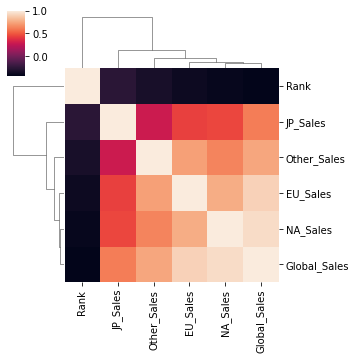

In [12]:
sns.clustermap(df.drop(columns='Year').corr(), figsize=(5, 5) )

- Les données Sales sont corrélées certaines plus que d'autres mais au final ce sont une combinason de la donnée cible Global Sales

In [13]:
len(df['Year'].unique())

40

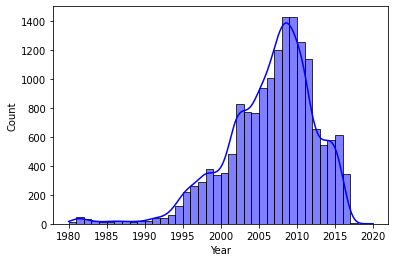

In [14]:
# Distribution par année
sns.histplot(df['Year'], kde=True, bins=len(df['Year'].unique()), color='blue',);

- on voit bien que notre jeu de données s'arrète à 2017 avec la valeur abérente de 2020

<AxesSubplot:xlabel='Year', ylabel='Genre'>

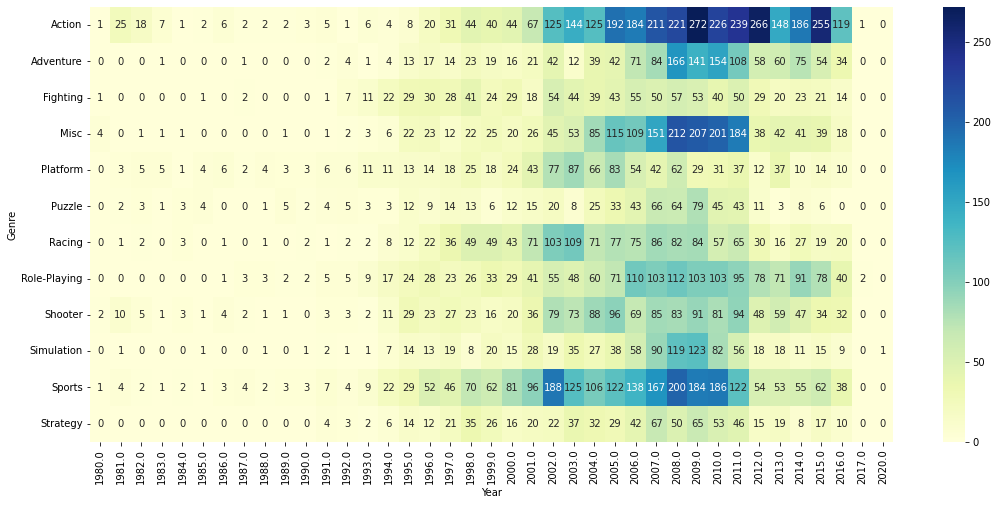

In [15]:
plt.figure(figsize=(18,8))
sns.heatmap(pd.crosstab(df['Genre'], df['Year']),cmap="YlGnBu", annot=True, fmt='d' ) #, annot=False, fmt='d')

- un autre schéma montre des phénomènes de mode pour certains type de jeux et le décollage du secteur dans les années 1995

(0.0, 10.0)

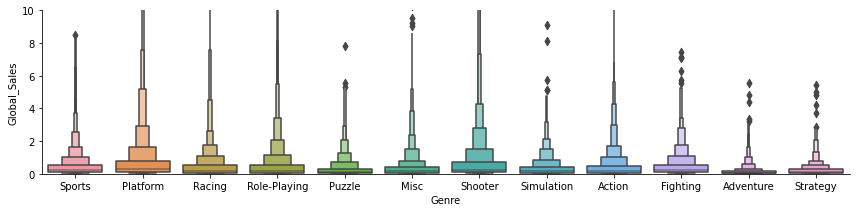

In [16]:
#sns boxen avec les ventes par Genre
sns.catplot(x='Genre', y='Global_Sales', data=df, height=3, aspect=4 , kind="boxen")
plt.ylim(0,10)

- Ce graphique montre que quelque soit le genre, un jeu peut avoir un grand succès

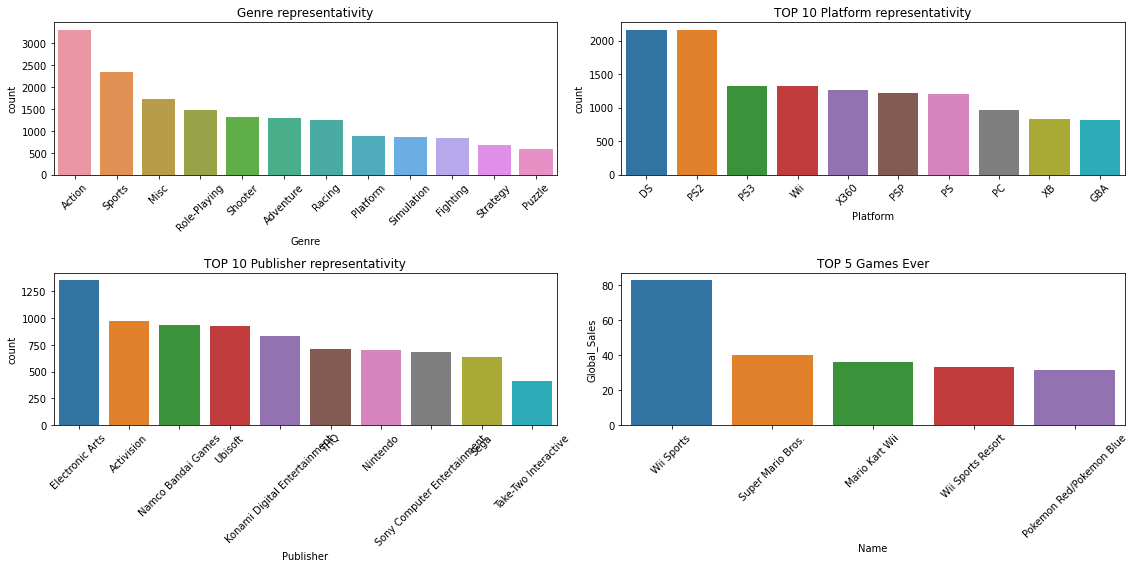

In [17]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(16,8)) #, sharey=True)

sns.countplot(x=df.Genre, order = df['Genre'].value_counts().index, ax=ax1)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Genre representativity')
ax1.set_xlabel('Genre')

top10_platform = df['Platform'].value_counts().head(10)
sns.barplot(x=top10_platform.index, y=top10_platform, order = top10_platform.index, ax=ax2)
ax2.tick_params(axis='x', labelrotation=45)
ax2.set_title('TOP 10 Platform representativity')
ax2.set_xlabel('Platform')
ax2.set_ylabel('count')

top10_publisher = df['Publisher'].value_counts().head(10)
sns.barplot(x=top10_publisher.index, y=top10_publisher, order = top10_publisher.index, ax=ax3)
ax3.tick_params(axis='x', labelrotation=45)
ax3.set_title('TOP 10 Publisher representativity')
ax3.set_xlabel('Publisher')
ax3.set_ylabel('count')

top5_games_best_sales = df[['Name','Global_Sales']].head(5)
sns.barplot(x='Name', y='Global_Sales', data=top5_games_best_sales, ax=ax4)
ax4.set_title('TOP 5 Games Ever')
ax4.tick_params(axis='x', labelrotation=45)

fig.tight_layout()


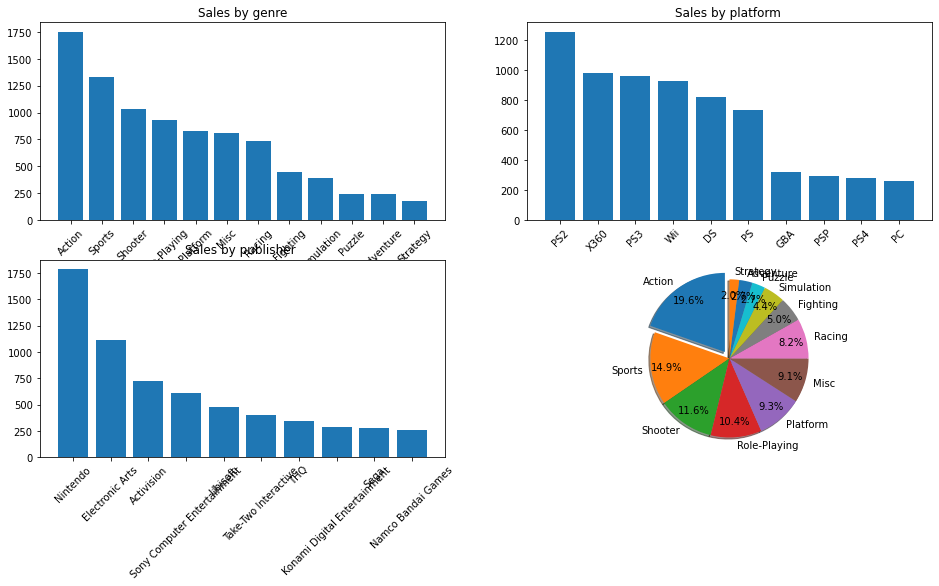

In [18]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(16,8)) #, sharey=True)

GS = df.groupby('Genre').agg({'Global_Sales': ['sum']}).reset_index()
GS.columns = ['genre','val']
GS.sort_values('val', inplace = True, ascending=False)
ax1.bar(GS.genre,  GS.val)
ax1.tick_params(axis='x', labelrotation=45)
ax1.set_title('Sales by genre')

explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0) 
ax4.pie(GS.val, explode = explode, labels=GS.genre, autopct='%1.1f%%',
        shadow=True, startangle=90, pctdistance =0.8)


GS = df.groupby('Platform').agg({'Global_Sales': ['sum']}).reset_index()
GS.columns = ['platform','val']
GS.sort_values('val', inplace = True, ascending=False)
GS = GS.head(10)
ax2.bar(GS.platform,  GS.val)
ax2.tick_params(axis='x', labelrotation=45, )
ax2.set_title('Sales by platform ')

GS = df.groupby('Publisher').agg({'Global_Sales': ['sum']}).reset_index()
GS.columns = ['publisher','val']
GS.sort_values('val', inplace = True, ascending=False)
GS = GS.head(10)
ax3.bar(GS.publisher,  GS.val)
ax3.tick_params(axis='x', labelrotation=45)
ax3.set_title('Sales by publisher ');

### Conclusion

> Le dataset est très pauvre et ne semble pas en l'état actuel nous permettre de faire des prédictions. En effet si on tient compte des commentaires fait lors de l'EDA, c'est à dire la suppression des lignes <1995, des colonnes inutiles (XX_Sales, Rank), > et des lignes contenant des NaN et valeurs abérentes, il restera les features Name,Platform,Year,Genre,Publisher,Global_Sales...
>
> ... soit 1 seule variable numerique, une date qui plus est !
> 

> A cela nous pouvons mentionner que les nouvelles plateformes ne sont pas presentes (Switch, PS5, Xbox One …) et que notre modèle les rencontrera forcement puisque on cherche à predire les ventes ou un niveau de vente pour un nouveau jeux !

> Coté biais possibles, nous notons:
> * que les jeux type FreeToplay ne peuvent pas faire partie du dataset pour une raison evidente
> * que les micro transactions des achats In-app ne sont probablement pas comptabilisés
> * que les jeux vendus avec une console seront avantagés en terme de vente (info difficile à trouver, c'est évident pour Wii Sport mais pas en général)
> * le site vgchartz explique qu'il fait des estimations mais ne dit pas comment il s'y prend et admet qu'il peut y avoir des erreurs d'estimation plus ou moins importantes (ca se comprend)
> * que vgchartz a arrété de faire des estimations en 2018 pour les raisons invoquées au debut
> * que les developpeurs/éditeurs d'un jeu peuvent avoir changés suite à des dépots de bilan ou des rachats/fusions par exemple
> * que nous avons des doutes sur les Publishers et la date qui ne comporte que l'année (de release ou de MAJ, on ne sait pas)

> Pistes pour la suite
> * Ajouter des données plus récentes en scrapant des dernières données de vgchartz
> * Scraper d'autres sources d'informations depuis  metacritic, jeuxvideo.com, wikipedia, google etc... pour ajouter de nouvelles features telles que des scores, des awards, des modes de jeux, duree de jeux etc...
> * Déduire des nouvelles features tels que le succès d'une licence, developpeurs etc... On peut intuitivement penser qu'une licence qui sort plusieurs jeux rencontre du succès et qu'un developpeur qui sort plusieurs jeux a probablement de plus gros moyens qu'un autre ayant développé qu'un seul jeux ... mais certains jeux ont pu avoir un grand succès 1 fois sans qu'il n'y ait jamais eu de suite
> * faire de l'analyse de sentiment sur les commentaires trouvés sur Reddit and Co
> * travailler sur la prediction des ventes d'un jeux, quelque soit sa disponibilité sur une console (on somme le revenu d'un même jeux)
> * travailler sur la qualité et la pertinence des données
> * à la vue des biais, on pourra s'orienter rapidement vers une problématique de classification en labelisant la cible global sales

> Difficultés entrevues
> * les nommages des jeux n'est pas tout a fait le même d'un site sur l'autre (sans compter les erreurs de saisie) et trouver une clé de jointure ne sera pas facile pour combiner les dataset. Cela va certainement entrainer des pertes de données.
> * ils y a énormement de sources informations et on pourrait avoir tendances à perdre des objectifs de vue
> * se répartir le travail dans l'équipe au miuex afin de pouvoir reintergrer nos dataset ensemble

vgchartz restera notre reference pour les genres, platformes et 'sales' pour la suite.
